<a href="https://colab.research.google.com/github/yashpickles/App-Behaviour-Analysis-/blob/main/App_Behaviour_Analysis_Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study: Directing Customers to Subscription through App behaviour Analysis**
###**-Yash Acharya**

## 1) Problem Statement

Here, we are working on financial application data and predicting the customer who will take the Premium services of the app or not. In accordance, the company will take action on the customers to give the offers or not.

**About App:**
A Financial Technology company (Fin-Tech Company) launches their mobile application. This app is used for financial purposes like Bank loans, Savings, etc. all at one place. It has two versions, free and premium. The free version contains basic features and if customer wants to use the Premium features then they have to pay a certain amount to unlock it.

The main goal of the company is to sell the Premium version of the app with low advertisement cost but they haven't found out the way to do it. That’s the reason they provid the Premium features in the free version app for 24 hours to collect the customer’s behavior.

**About the Dataset:**

*   user: Unique ID for each user.
*   first_open: Date (yy-mm-dd) and time (Hour:Minute:Seconds:Milliseconds) of login on app first time.
*   dayofweek: On which day user logon.
0: Sunday
1: Monday
2: Tuesday
3: Wednesday
4: Thursday
5: Friday
6: Saturday
*   Hour: Time of a day in 24-hour format customer logon. It is correlated with dayofweek column. 
*   age: The age of the registered user.
*   screen_list: The name of multiple screens seen by customers, which are separated by a comma.
*   numscreens: The total number of screens seen by customers.
*   minigame: Tha app contains small games related to finance. If the customer played mini-game then 1 otherwise 0.
*   used_premium_feature: If the customer used the premium feature of the app then 1 otherwise 0.
*   enrolled: If the user bought a premium feature app then 1 otherwise 0.
*    enrolled_date: On the date (yy-mm-dd) and time (Hour:Minute:Seconds:Milliseconds) the user bought a premium features app.
*   liked: The each screen of the app has a like button if the customer likes it then 1 otherwise 0.


## 2) Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

## 3) Importing the Dataset

In [2]:
dataset = pd.read_csv('New_appdata20.csv')

## 4) Data Preprocessing

In [3]:
response = dataset["enrolled"]
dataset = dataset.drop(columns='enrolled')

## 5) Splitting the Dataset into Training and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, response, test_size = 0.2, random_state = 0)

In [5]:
train_identifier = X_train['user']
X_train = X_train.drop(columns='user')
test_identifer = X_test['user']
X_test = X_test.drop(columns='user')


## 6) Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train2 = pd.DataFrame(sc_x.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_x.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

## 7) Model Training

In [11]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 8) Prediciting the Test set Result

In [12]:
y_pred = classifier.predict(X_test) 

## 9) Making a Confusion Matrix

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      5072
           1       0.76      0.77      0.77      4928

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



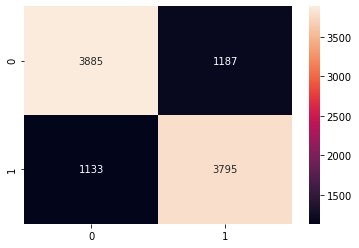

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
sns.heatmap(cm, annot=True, fmt="d")

## 10) Using K-Fold cross Validation

In [16]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print("Logistic Accuracy: %0.3f (+/- %0.3f)" %(accuracies.mean(), accuracies.std()*2))

Logistic Accuracy: 0.767 (+/- 0.009)


## 11) Formatting the Final Results

In [17]:
final_results = pd.concat([y_test, test_identifer], axis=1).dropna()
final_results['predicted_results'] = y_pred
final_results[['user', 'enrolled', 'predicted_results']].reset_index(drop=True)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,0
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1
